# Final activity: Analyzing gene expression of Acute Leukaemia Patients

For the final exercise, you will use what you have learnt so far to analyze a gene expression dataset from acute leukaemia patients given an outline of the steps to take. This DNA microarray dataset was initially published in Golub et al. ["Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression Monitoring"](https://www.science.org/doi/10.1126/science.286.5439.531?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed)

### About the Dataset:

The dataset contains the gene expression levels of 7129 genes in cells from both the bone marrow and peripheral blood of patients diagnosed with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). This dataset was utilized initially for the classification of patients into AML and ALL categories. 

There are **two datasets** containing the initial (training, 38 samples) and independent (test, 34 samples) datasets used in the paper. These datasets contain measurements corresponding to ALL and AML samples from Bone Marrow and Peripheral Blood. Intensity values have been re-scaled such that overall intensities for each chip are equivalent. A total of 7129 gene features were measured. 


### Dataset Location:

The dataset is provided as three .csv files from the [course github repository](https://github.com/TheDeanLab/Intro-to-Python-2024/tree/main/activities/gene_expression) 

1. `actual.csv` - this gives the actual disease status of each sample, either ALL or AML
2. `data_set_ALL_AML_train.csv` - this is the training data, 7129 genes x 38 samples
3. `data_set_ALL_AML_independent.csv` - this is the testing data, 7129 genes x 34 samples


### Overview of Analysis Steps:

We will use this dataset to conduct a typical analysis for DNA microarray and bulk sequencing. This involves:

1. **Preprocessing the data** 
    - so that the data is suitable for computation
    
2. **Identifying the most informative gene features** 
    - if a gene has 0-value it is 100% not informative

3. **Exploratory analysis** 

    - use dimensionality reduction to look for patterns, check problems, e.g. does the data support ALL and AML separation?

4. **What genes determine AML or ALL**:
    1. hypothesis testing between AML and ALL group
    2. machine learning classifiers and feature importance

## Step 0. Load in the data

You will first write code to read in all 3 csv's using pandas library. Then print the shape of the tables you have read in. 

Something might look wrong - Can you figure it out? 

In [99]:
import pandas as pd 

# Write code to load the training dataset (data_set_ALL_AML_train.csv)

# Write code to load the testing dataset (data_set_ALL_AML_independent.csv)

# Write code to load in the disease status of patients


## Step 1. Clean and Preprocess the data

### a) Deleting extra non-numeric columns in train and test tables

After reading in the datasets, you will notice that the shape of the table is wrong. For train we expect 39 patients i.e. 39 columns. For test we expect 35 patients, i.e. 35 columns. We appear to have exactly double that. 

In [80]:
# Write a print statement to display the first few entries of train or test table. 
# What is the column names of the extra columns that are not numerical?



Write code to remove the extra columns to generate an only numeric table for train and test. **HINT**: [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [81]:
# Remove call columns in training dataset

# Remove call columns in testing dataset


### b) Cross-index gene expression and disease status for each patient

Check the number of patients with disease status. You will see that it is more than the number of patients in train or test. Oh noes..... 

We can only do interesting analysis when we have both the gene expression AND the disease status. 

The patient id in the train and test tables are given by the column names. 
You need to write code so that each patient that has gene expression info has the disease status designation.

**Expected Outcome**:
patients with both gene expression and disease status. You should have:
1. two variables, `y_label_train` and `y_label_test` with the disease status of patients in train and test
2. two numpy arrays, `X_train` and `X_test` with the gene expression of the same patients, size of array is n_patients x n_genes i.e. columns = genes
3. a variable, `gene_description` to store gene description
4. a variable, `gene_accession_number` to store gene accession number

**HINT**: You can use the table approach or the Python loop approach
- transpose the table and use pd.merge
OR
- use for loops and numpy np.unique and if-else control 

In [82]:
# 1. Find the disease label i.e. ALL or AML for patients in train data. 
# Save the expression in X_train variable, save their disease label as y_label_train

In [83]:
# 2. Find the disease label i.e. ALL or AML for patients in test data. 
# Save the expression in X_test variable, save their disease label as y_label_test

In [84]:
# 3. create a numpy variable to store gene description

In [85]:
# 4. create a numpy variable to store gene accession number

## Step 2. Pruning the data, retaining the most informative gene features

Use the following code snippet with your `X_train` array to visualize a heatmap of the gene expression. 

What is the problem here? 

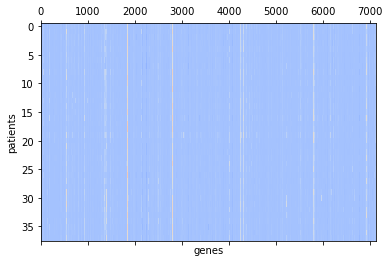

In [86]:
import numpy as np 
X_train = train.iloc[:,2:].values.T.astype(np.float32)

import pylab as plt 

fig, ax = plt.subplots()
ax.matshow(X_train, cmap='coolwarm')
ax.set_xlabel('genes')
ax.set_ylabel('patients')
ax.set_aspect('auto')
plt.show()

Let's also make histograms of the first two genes, to check their distribution.

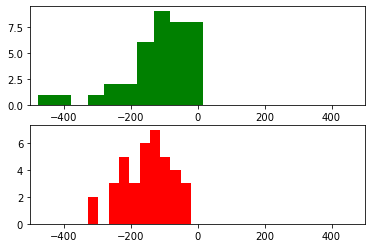

In [87]:
gene1 =  X_train[:,0] # write code to get this from X_train
gene2 =  X_train[:,1] # write code to get this from X_train

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].hist(gene1, bins=10, color='g')
ax[0].set_xlim([-500,500])
ax[1].hist(gene2, bins=10, color='r')
ax[1].set_xlim([-500,500])
plt.show()

Did you see that the x-values of the histograms are very different? - try different genes to convince yourself. 

**Data normalization is essential for analysis**:

It's very common for genes to have different range of values. One reason is because the expression is not measured on an absolute scale. 

What this means however is that its difficult to compare across genes i.e. use the multi-dimensional gene signature to compare patients. This is why we need to perform preprocessing to normalize the data. 

The preprocessing is done on the combined train and test expression to apply the same steps to both for fairness.

### Overview of Preprocessing Steps:

1. create a variable `X` that is the merged array of `X_train` and `X_test`
2. write function to remove any genes and associated gene ids information that was not measured for a patient i.e. is np.nan 
3. write function to remove any genes and associated gene ids information that has zero-variance (i.e. they are the same value for each patient). **HINT:** `sklearn.feature_selection.VarianceThreshold`
4. write function to standard scale the remaining genes. **HINT:** `sklearn.preprocessing.StandardScaler`

In [88]:
# 1. make a variable X that merges X_train and X_test. 

In [89]:
# 2. Write a function to apply to X to remove any genes (i.e. columns) where a patient did not provide a value. i.e. was np.nan
# Make sure to save the index and apply it also to `gene_description` and `gene_accession_number`.  
# Output should be a variable X_filter

In [90]:
# 3. Write a function to apply to X_filter, to removes genes (i.e. columns) which are zero-variance across patients. 
# Output should write over X_filter 
# HINT: use sklearn.feature_selection.VarianceThreshold

In [91]:
# 4. Write a function to apply to X_filter, to standard scale gene expression 
# Output should be a variable X_stdscale  
# Each gene should now be zero mean and one variance. **Bonus:** write a function to check this.  
# HINT: use sklearn.preprocessing.StandardScaler

## Step 3. Exploratory analysis

Before we do anything fancy, we always want to check whether the data is 'good enough'. 

Here, we want to check whether using the gene expression, there is any evidence we might be able to separate the two cancers, ALL and AML. 

A quick and cheerful way to do this is to apply dimensionality reduction. There are of course many algorithms for performing dimensionality reduction with different pros and cons. 

A good rule of thumb is to start with PCA, principal components analysis. Why? - it is the easiest to interpret. If the data separates under PCA, you can bet you can classify it without anything fancy. If PCA doesn't work well, you may try e.g. UMAP, t-SNE, PacMAP which are nonlinear dimensionality reduction algorithms

### Principal Components Analysis (PCA)

PCA is an essential algorithm for any budding statistician or data scientist. I suggest watching a YouTube video or google search to understand more. 

Intuitively, your n-dimensional data lives in an n-dimensional space, such that your data places each patient at n-dimensional coordinates. What PCA does is it fits an n-dimensiona ellipsoid across all patients. Then it finds a rotation of the data to display it onto the top K major axes of this ellipsoid. 

We can use PCA through `sklearn.decomposition.PCA` 

In [92]:
# 1. apply sklearn.decomposition.PCA to fit a PCA model with n_components=2 to your X_stdscale


In [93]:
# 2. Merge your disease label variables into a single variable. This should be the same number of patients as X_stdscale 


In [94]:
# 3. use sklearn.preprocessing.LabelEncoder to map your labels into integers

In [95]:
# 4. use matplotlib to scatter plot the pca outputs, coloring points by disease status. 

In [96]:
# 5. (Extension) apply PCA but now using the un-normalized data i.e. X_filter or X. What do you find? 

### (Extension): Try different dimensionality reduction techniques

Scikit-learn has a gallery of dimensionality reduction techniques. https://scikit-learn.org/stable/modules/manifold.html
Try applying some of these in the same manner and see what is the result.

If you are feeling really ambitious, check out dimensionality reduction techniques from other sources e.g. UMAP (from [umap-learn](https://umap-learn.readthedocs.io/en/latest/) and PacMAP (from https://github.com/YingfanWang/PaCMAP)



In [97]:
# Have fun :D

## Step 4. Finding what genes determine Leukaemia type

From the PCA plots you should see that there was separation between the different leukaemia types.

With this data, generally our question is to find the driving genes between these two conditions. We generally use two criteria:

1. what are the genes with best classification performance (use ML classifiers)
2. what are the genes that are most statistically differential (hypothesis tests)

### a). Train a machine learning classifer and find driving genes (Support Vector Machine with L1 feature selection)

This method requires the data to be split into training (model fitting) and testing (model evaluation). The basic idea is that if we use all the data then the model will overfit, as generally the machine learning model can have many more model parameters than the data diversity. 

For this exercise we will use a classical machine learning classifier called a [support vector machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine). These are easy to understand, easy to use, give great robust performance, and well implemented within scikit-learn. Here we will use a linear SVM which will try to fit a best plane of separation. 

Usually ML classifiers are applied directly on the scaled data i.e. not after PCA. 

### Overview of Steps
1. split `X_stdscale` back into train and test i.e. create two variables `X_train_stdscale`, `X_test_stdcale`
2. apply the fitted labelencoder to transform `y_label_train` and `y_label_test` to be integer giving two variables, `y_label_train_int`, `y_label_test_int`
3. compute the number of ALL and AML cases - are they balanced? i.e. is it 50-50 occurrence? 
4. use `sklearn.svm.LinearSVC` to fit a model to `X_train_stdscale` and `y_label_train_int`. Check what argument you need to set in order to account for the label imbalance. **HINT:** c.f.  refer to the example of 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
5. Evaluate the fitted model using `X_test_stdscale` and `y_label_test_int` by computing and visualizing the confusion matrix. **HINT:** c.f. the same example, https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
6. If you are happy with your classifier, follow the SVM example in https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py to extract the SVM weights as a measure of feature importance to rank your genes with decreasing importance.

### b). Hypothesis testing of individual gene expression between AML and ALL

Machine learning classifiers are sensitive to the number of genes and which genes are used as features (columns). Alternative method is to try to use statistics to analyze. 

Here we are going to do the basic statistics approach using t-test and fdr correction. We won't cover other necessary steps usually doing before statistics testing such as batch correction. In practice, you would use dedicated packages e.g. Seurat in R or scanpy in Python that integrate this functionality for gene expression analysis. 


### Overview of Steps
1. Split your combined normalized dataset into AML and ALL patients i.e. have a `X_stdscale_AML` and `X_stdscale_ALL` array.  
2. Use a for loop and the independent t-test, `scipy.stats.ttest_ind` to compute the test statistic and p-value for each gene.
3. Convert the results into a table whose columns are `['Gene Accession Number', 'T_Value', 'P_Value']`
4. Install `statsmodels` library, (see its [website](https://www.statsmodels.org/stable/index.html) for install instructions)
5. Use `statsmodels.stats.multitest.fdrcorrection` on the computed p-values to get corrected p-values.
6. Set a significance-level e.g. $p<0.05$, apply this to filter on corrected p-values and produce a sorted list of significant genes sorted in ascending order by p-value (remember: small the p-value, the more significant
7. Generate histograms of expresssion in AML and ALL patients for top ranked genes. Plot AML and ALL histogram on the same axis to check that the statistical test has worked (i.e. two histograms should be different with minimal overlap the smaller the p-value!).  
8. (Extension:) Make a combined heatmap with AML and ALL patients visualizing the significant genes. Display a sorted heatmap such where all AML patients are first, then all ALL patients.